In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets

###Importing Datasets

In [2]:
iris = pd.read_csv('Iris.csv', index_col='Id')

In [3]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


###Data Visualization

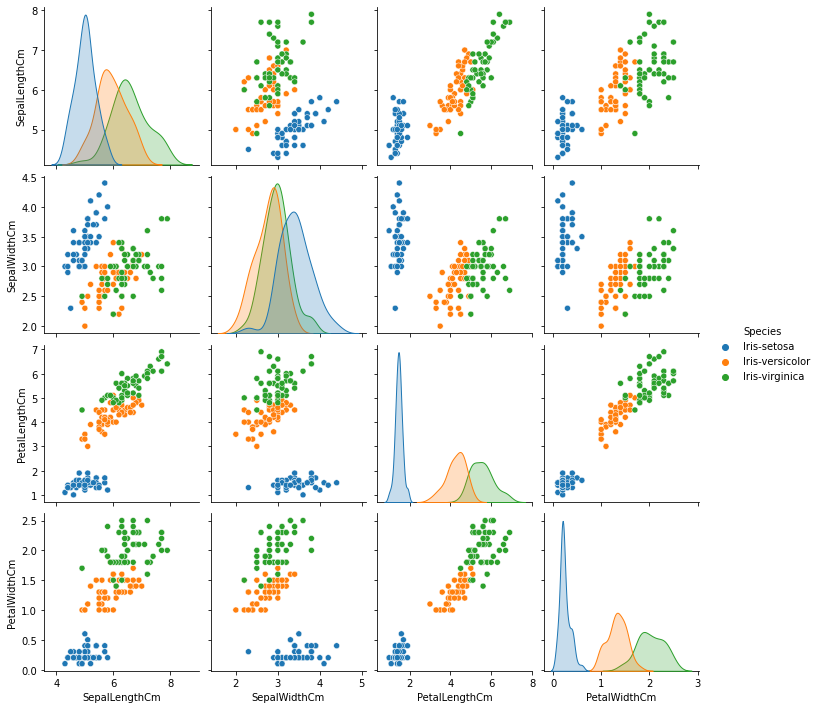

In [6]:
sns.pairplot(iris, hue='Species')

<p>We can observe that Iris-setosa makes a distinctive cluster in every parameter, while other two species overlap a bit with each other.</p>

In [7]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text major ticklabel objects>)

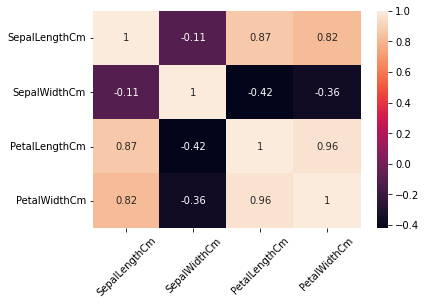

In [8]:
sns.heatmap(iris.corr(), annot=True)
plt.xticks(rotation=45)

<p>We can observe that the petal width is highly correlated to petal length and the sepal width is not related to the sepal length.</p>

(array([   5,   15,   25,   35,   45,   55,   65,   75,   85,   95,  105,
         115,  125,  135,  145,  155,  165,  175,  185,  195,  205,  215,
         225,  235,  245,  255,  265,  275,  285,  295,  305,  315,  325,
         335,  345,  355,  365,  375,  385,  395,  405,  415,  425,  435,
         445,  455,  465,  475,  485,  495,  505,  515,  525,  535,  545,
         555,  565,  575,  585,  595,  605,  615,  625,  635,  645,  655,
         665,  675,  685,  695,  705,  715,  725,  735,  745,  755,  765,
         775,  785,  795,  805,  815,  825,  835,  845,  855,  865,  875,
         885,  895,  905,  915,  925,  935,  945,  955,  965,  975,  985,
         995, 1005, 1015, 1025, 1035, 1045, 1055, 1065, 1075, 1085, 1095,
        1105, 1115, 1125, 1135, 1145, 1155, 1165, 1175, 1185, 1195, 1205,
        1215, 1225, 1235, 1245, 1255, 1265, 1275, 1285, 1295, 1305, 1315,
        1325, 1335, 1345, 1355, 1365, 1375, 1385, 1395, 1405, 1415, 1425,
        1435, 1445, 1455, 1465, 1475, 

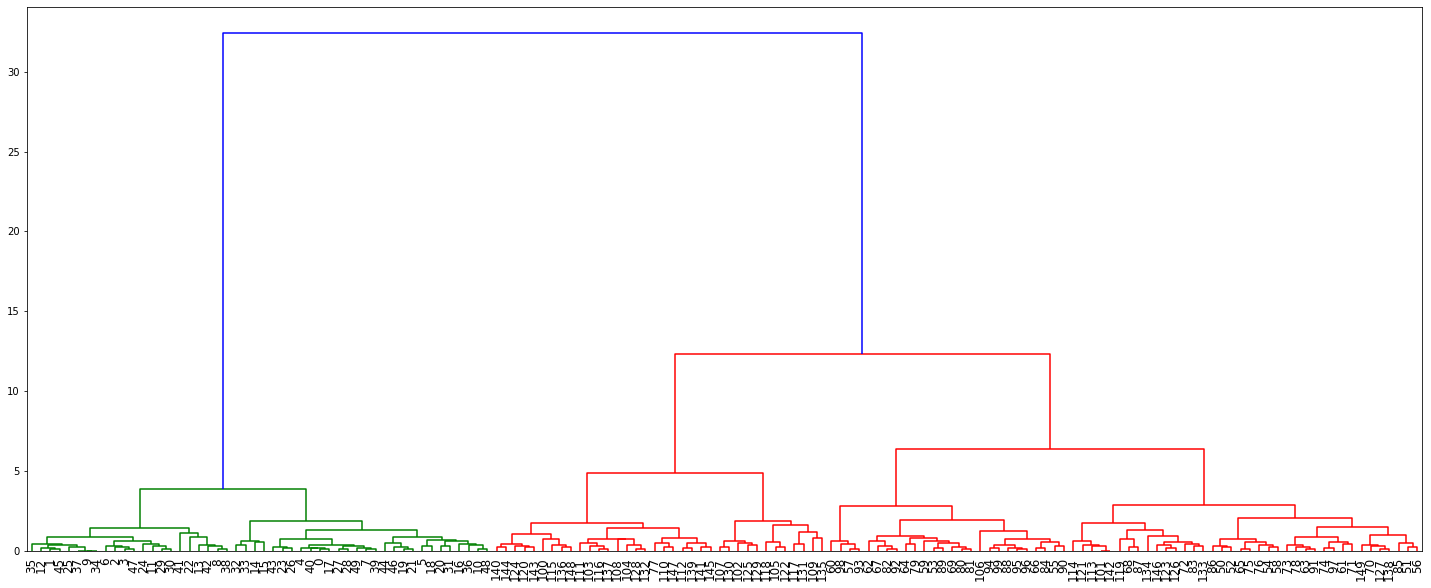

In [9]:
import scipy.cluster.hierarchy as sch
X = iris.drop(columns='Species').values;
plt.figure(figsize=(25,10))
dendogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.xticks(rotation=90, fontsize=12)

In [10]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

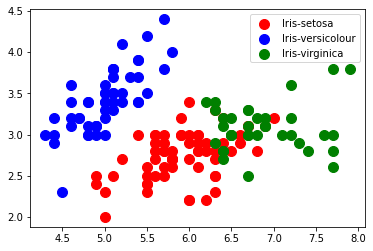

In [11]:
plt.scatter(X[y_hc == 0,0], X[y_hc == 0,1], s = 100, c = 'red', label ='Iris-setosa')
plt.scatter(X[y_hc == 1,0], X[y_hc == 1,1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_hc == 2,0], X[y_hc == 2,1], s = 100, c = 'green', label = 'Iris-virginica')
plt.legend()

In [12]:
X = iris.iloc[:, :4].values
y = iris.iloc[:, 4].values

In [13]:
X.shape, y.shape

((150, 4), (150,))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


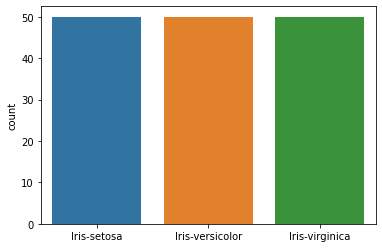

In [14]:
sns.countplot(y)

###Data preprocessing

In [15]:
target = iris['Species']
df = iris.copy()
df = df.drop('Species', axis = 1)
df.shape

(150, 4)

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import sklearn.metrics as sm
from sklearn.tree import plot_tree

In [17]:
X = iris.iloc[:, [0,1,2,3]].values
le = LabelEncoder()
iris['Species'] = le.fit_transform(iris['Species'])
y = iris['Species'].values
iris.shape

(150, 5)

###Training the model

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
print("Training split:", X_train.shape)
print('Testing split:', X_test.shape)

Training split: (120, 4)
Testing split: (30, 4)


####Defining Decision Tree Classifier

In [19]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
print("Decision Tree Classifier Created")

Decision Tree Classifier Created


###Classification Report and Confusion Matrix

In [20]:
y_pred = dtree.predict(X_test)
print("Classification report\n:", classification_report(y_test,y_pred))

Classification report
:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [21]:
print("Accuracy:", sm.accuracy_score(y_test, y_pred))

Accuracy: 1.0


<p>The accuracy is 1 or 100% since all four attributes were taken into consideration.</p>

###Visualization of the trained model

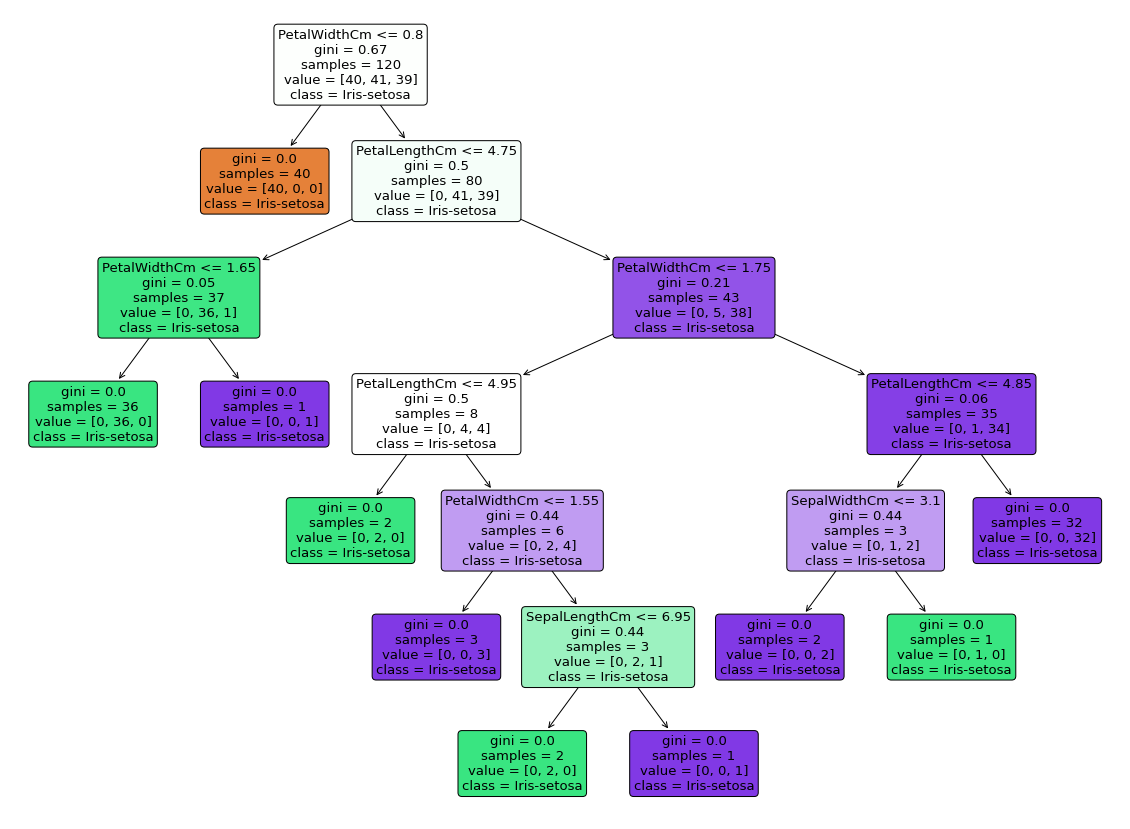

In [22]:
plt.figure(figsize=(20,15))
tree = plot_tree(dtree, feature_names= df.columns, rounded=True,filled=True, precision=2, class_names=target.values)